# Grid Example

Show a grid, to check that it's aligned correctly in terms of physical pixels. One can see how during the resizing, when the data has not updated to the new size, the Moiré effect temporarily occurs. 

RFBOutputContext()

Grid()
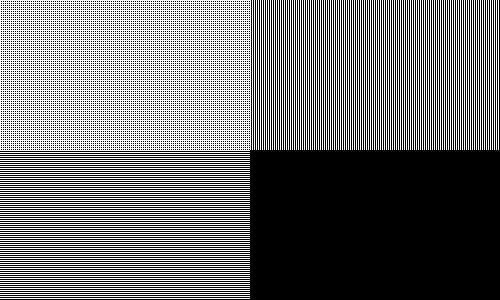

In [1]:
import numpy as np
import jupyter_rfb


class Grid(jupyter_rfb.RemoteFrameBuffer):
    def handle_event(self, event):
        if event["event_type"] == "resize":
            self._size = event
            # self.print(event)  # uncomment to display the event

    def get_frame(self):
        w, h, r = self._size["width"], self._size["height"], self._size["pixel_ratio"]
        physical_size = int(h * r), int(w * r)
        a = np.zeros((physical_size[0], physical_size[1], 3), np.uint8)
        self.draw_grid(a)
        return a

    def draw_grid(self, a):
        a[::2, : a.shape[1] // 2] = 255
        a[: a.shape[0] // 2, ::2] = 255


w = Grid()
w

RFBOutputContext()

Grid2()
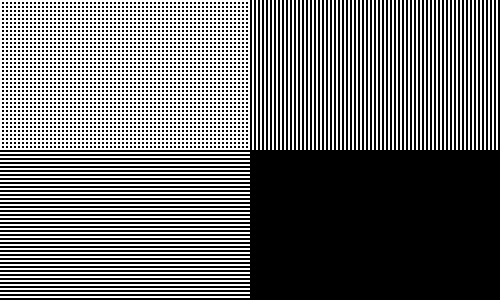

In [2]:
class Grid2(Grid):
    def draw_grid(self, a):
        a[::4, : a.shape[1] // 2] = 255
        a[1::4, : a.shape[1] // 2] = 255
        a[: a.shape[0] // 2, ::4] = 255
        a[: a.shape[0] // 2, 1::4] = 255


w = Grid2()
w